<a href="https://colab.research.google.com/github/rahmaashraf310/Heart_Disease_Project/blob/main/notebooks/03_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (303, 13)


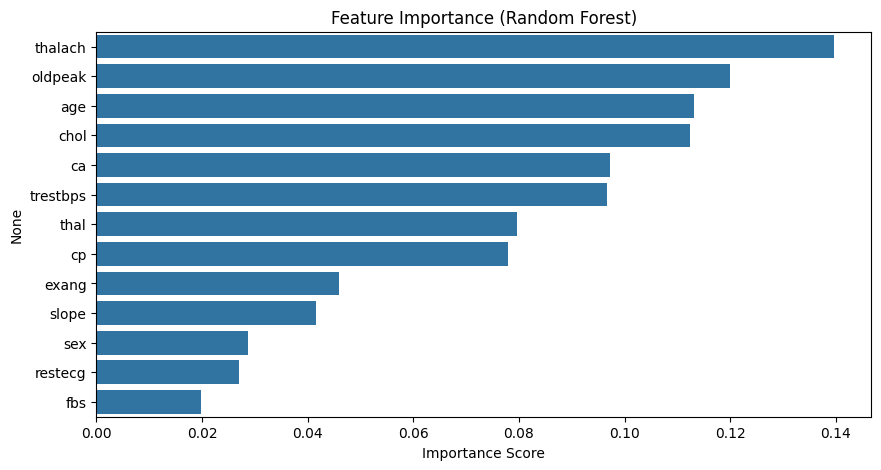

Top features by Random Forest:
 thalach     0.139706
oldpeak     0.120006
age         0.113118
chol        0.112458
ca          0.097234
trestbps    0.096649
thal        0.079614
cp          0.078012
exang       0.045911
slope       0.041650
dtype: float64
Top features by RFE: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca']
Chi-square feature scores:
 ca         99.976551
thal       70.294698
exang      41.534482
cp         16.881183
restecg    14.057550
slope      10.542204
sex         7.499223
fbs         6.658223
dtype: float64
Final selected features: ['oldpeak', 'exang', 'ca', 'chol', 'cp', 'fbs', 'thal', 'sex', 'age', 'slope', 'thalach', 'restecg', 'trestbps']
✅ Reduced dataset saved to results/selected_features.csv
✅ Reduced dataset saved to results/selected_features.csv


In [ ]:
# =============================================
# Heart Disease Project — Step 2.3 Feature Selection
# =============================================

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ---------------------------------------------
# 2. Load cleaned dataset
# ---------------------------------------------
df = pd.read_csv("data/heart_clean.csv")

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Dataset shape:", X.shape)

# Define feature groups
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
nominal_features = ["cp", "restecg", "thal"]
ordinal_features = ["slope"]

# Handle missing values
num_imputer = SimpleImputer(strategy="median")
X[numeric_features] = num_imputer.fit_transform(X[numeric_features])

cat_imputer = SimpleImputer(strategy="most_frequent")
for col in nominal_features + ordinal_features:
    if col in X.columns:
        X[[col]] = cat_imputer.fit_transform(X[[col]])

# ---------------------------------------------
# 3. Feature Importance (Random Forest)
# ---------------------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

print("Top features by Random Forest:\n", feat_imp.head(10))

# ---------------------------------------------
# 4. Recursive Feature Elimination (RFE)
# ---------------------------------------------
model = LogisticRegression(max_iter=1000, solver="liblinear")
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
print("Top features by RFE:", list(rfe_features))

# ---------------------------------------------
# 5. Chi-Square Test (categorical features only)
# ---------------------------------------------
cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

X_chi = X[cat_features].copy()
chi_imputer = SimpleImputer(strategy="most_frequent")
X_chi = pd.DataFrame(chi_imputer.fit_transform(X_chi), columns=cat_features)

chi_selector = SelectKBest(score_func=chi2, k="all")
chi_selector.fit(X_chi, y)

chi_scores = pd.Series(chi_selector.scores_, index=cat_features).sort_values(ascending=False)
print("Chi-square feature scores:\n", chi_scores)

# ---------------------------------------------
# 6. Define final selected features
# (Union of RF top 8 and RFE features)
# ---------------------------------------------
final_features = list(set(feat_imp.head(8).index) | set(rfe_features))
print("Final selected features:", final_features)

X_reduced = X[final_features]
reduced_df = pd.concat([X_reduced, y], axis=1)

# ---------------------------------------------
# 7. Save reduced dataset
# ---------------------------------------------
reduced_df.to_csv("results/selected_features.csv", index=False)
print("✅ Reduced dataset saved to results/selected_features.csv")